This notebook presents an example on how to use Pipelines to chain tools using the PySAGA-cmd package.

This example focuses on getting a hidrologically preprocessed DEM. This is done by chaining two SAGA GIS tools:

- Sink Drainage Route Detection
- Sink Removal

In [1]:
from PySAGA_cmd import (
    SAGA,
    get_sample_dem
)

In [2]:
saga = SAGA()
preprocessing = saga / 'ta_preprocessor'
print(preprocessing.execute().stdout)

Path to "saga_cmd" was not provided. Attempting to find it.
saga_cmd found at "saga_cmd".
____________________________

   #####   ##   #####    ##
  ###     ###  ##       ###
   ###   # ## ##  #### # ##
    ### ##### ##    # #####
 ##### #   ##  ##### #   ##
____________________________

SAGA Version: 8.5.1


Library:	Preprocessing
Category:	Terrain Analysis
File:	/usr/local/lib/saga/libta_preprocessor.so
Description:
Tools for the preprocessing of digital terrain models.

Tools:
 [0]	Flat Detection
 [1]	Sink Drainage Route Detection
 [2]	Sink Removal
 [3]	Fill Sinks (Planchon/Darboux, 2001)
 [4]	Fill Sinks (Wang & Liu)
 [5]	Fill Sinks XXL (Wang & Liu)
 [6]	Burn Stream Network into DEM
 [7]	Breach Depressions

type -h or --help for further information




In [3]:
route_detection = preprocessing / 'Sink Drainage Route Detection'
sink_removal = preprocessing / 'Sink Removal'

sample_dem = get_sample_dem()

In [4]:
route_detection = route_detection(elevation=sample_dem, sinkroute='temp.tif')

sink_removal = sink_removal(dem=route_detection.elevation, sinkroute=route_detection.sinkroute,
                            dem_preproc='/media/alex/alex/python-modules-packages-utils/PySAGA_cmd/PySAGA_cmd/dem_preprocessed.tif')

In [5]:
pipeline = route_detection | sink_removal

In [6]:
print('Object type:', type(pipeline))
print('Tools:', pipeline.tools)
print('Tool count:', len(pipeline), end='\n'*2)

Object type: <class 'PySAGA_cmd.saga.Pipeline'>
Tools: [Tool(library=Library(saga=SAGA(saga_cmd=SAGACMD(path=PosixPath('saga_cmd')), version=Version(major=8, minor=5, patch=1)), library='ta_preprocessor'), tool='Sink Drainage Route Detection', parameters={'elevation': '/media/alex/alex/python-modules-packages-utils/PySAGA_cmd/PySAGA_cmd/assets/DEM_30m.tif', 'sinkroute': '/tmp/tmp1el8fxdh/sinkroute_1713165295.tif'}), Tool(library=Library(saga=SAGA(saga_cmd=SAGACMD(path=PosixPath('saga_cmd')), version=Version(major=8, minor=5, patch=1)), library='ta_preprocessor'), tool='Sink Removal', parameters={'dem': '/media/alex/alex/python-modules-packages-utils/PySAGA_cmd/PySAGA_cmd/assets/DEM_30m.tif', 'sinkroute': '/tmp/tmp1el8fxdh/sinkroute_1713165295.tif', 'dem_preproc': '/media/alex/alex/python-modules-packages-utils/PySAGA_cmd/PySAGA_cmd/dem_preprocessed.tif'})]
Tool count: 2



In [7]:
outputs = pipeline.execute(verbose=True)

-------------------------
ta_preprocessor / Sink Drainage Route Detection
    -ELEVATION=/media/alex/alex/python-modules-packages-utils/PySAGA_cmd/PySAGA_cmd/assets/DEM_30m.tif -SINKROUTE=/tmp/tmp1el8fxdh/sinkroute_1713165295.tif

[████████████████████████████████████████████████████████████] 100/100% | Elapsed time: 0:00:02        
-------------------------
ta_preprocessor / Sink Removal
    -DEM=/media/alex/alex/python-modules-packages-utils/PySAGA_cmd/PySAGA_cmd/assets/DEM_30m.tif -SINKROUTE=/tmp/tmp1el8fxdh/sinkroute_1713165295.tif -DEM_PREPROC=/media/alex/alex/python-modules-packages-utils/PySAGA_cmd/PySAGA_cmd/dem_preprocessed.tif

[████████████████████████████████████████████████████████████] 100/100% | Elapsed time: 0:00:02        


<Axes: >

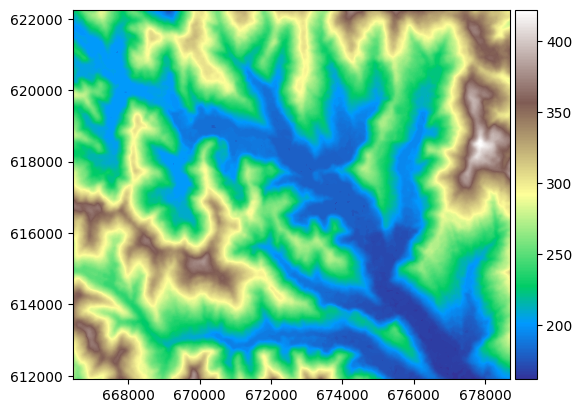

In [8]:
rasters = outputs[-1].rasters
dem_preproc = rasters['dem_preproc']
dem_preproc.plot(cmap='terrain')